In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree


In [3]:
# Load dataset from Prodigy GitHub
url = "https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/main/Task%203/bank/bank.csv"
df = pd.read_csv(url, sep=';')

print("Shape of dataset:", df.shape)
print("First 5 rows:")
print(df.head())


Shape of dataset: (4521, 17)
First 5 rows:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [4]:

data_encoded = pd.get_dummies(df, drop_first=True)


X = data_encoded.drop("y_yes", axis=1)
y = data_encoded["y_yes"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3616, 42)
Testing set shape: (905, 42)


In [5]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)

# Training model
clf.fit(X_train, y_train)

print("Decision Tree Model Trained Successfully ")


Decision Tree Model Trained Successfully 


Model Accuracy: 0.8850828729281768

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.96      0.94       801
        True       0.50      0.28      0.36       104

    accuracy                           0.89       905
   macro avg       0.71      0.62      0.65       905
weighted avg       0.86      0.89      0.87       905



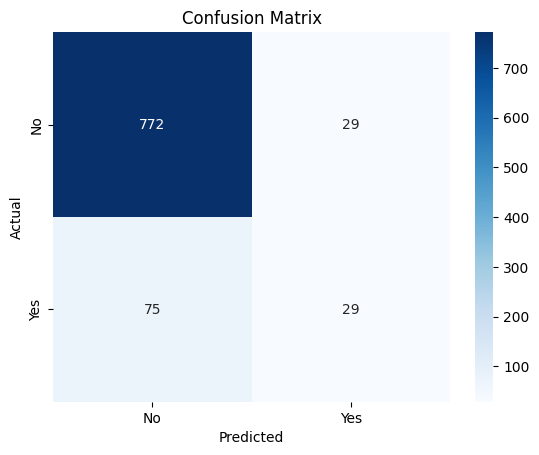

In [11]:
# Predicting on test data
y_pred = clf.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
